# CEN426 - Introduction to Machine Learning
---
## Homework 01
The student must use both K-Means (ignoring the class column in the data) and K-NN on a sample dataset, and then interpret the results.

### Student ID: 2016556017
### Author: Furkan Çetinkaya \<ctnky.frkn@gmail.com\>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans                   # K-Means
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

### Read and Prepare Dataset

In [2]:
def prepare_dataset(Xt, Xp):
    X = pd.concat([Xt, Xp], ignore_index=True)
    X.Gender         = pd.Categorical(X.Gender)          # Make the type of spesified features categorical
    X.Customer_Type  = pd.Categorical(X.Customer_Type)
    X.Type_of_Travel = pd.Categorical(X.Type_of_Travel)
    X.Class          = pd.Categorical(X.Class)
    X.satisfaction   = pd.Categorical(X.satisfaction)
    X['Gender']         = X.Gender.cat.codes            # Convert categorical data into its enumerated class codes
    X['Customer_Type']  = X.Customer_Type.cat.codes
    X['Type_of_Travel'] = X.Type_of_Travel.cat.codes
    X['Class']          = X.Class.cat.codes
    X['satisfaction']   = X.satisfaction.cat.codes

    y = X['satisfaction']                  # Training label set
    X = X.drop('satisfaction', axis=1)     # Drop label from training dataset
    return (X,y)

In [3]:
Xt = pd.read_csv("Airline_Passenger_Satisfaction/train.csv")     # Read training data
Xp = pd.read_csv("Airline_Passenger_Satisfaction/test.csv")      # Read prediction data
Xt = Xt.drop(['idx', 'id'], axis=1)        # Drop unnecessary features on training dataset
Xp = Xp.drop(['idx', 'id'], axis=1)        # Drop unnecessary features on prediction dataset
(X,y) = prepare_dataset(Xt, Xp)  # Preprocess dataset
X[X.isnull()] = 0        # Replace N/A in the prediction dataset with 0
X[X.isnull()] = 0        # Replace N/A in the training dataset with 0

### Reduce Dimensionality

In [4]:
pca = PCA(n_components=2)   # Principle Component Analysis
Xr = pca.fit_transform(X)   # Reduced training set

In [5]:
#from sklearn.model_selection import cross_val_score
#k = 2
#kf = KFold(n_splits=k, random_state=None)
#kmeans = KMeans(n_clusters=2, random_state=0)
#knn = KNeighborsClassifier(n_neighbors=6)
#result1 = cross_val_score(kmeans , Xr, y, cv = kf)
#result2 = cross_val_score(knn , Xr, y, cv = kf)
#print("KMeans Avg accuracy: {}".format(result1.mean()))
#print("KNN Avg accuracy: {}".format(result2.mean()))

### Implement KMeans and KNN

In [6]:
k = 2
kfold = KFold(n_splits=k, random_state=0, shuffle=True)
kmeans = KMeans(n_clusters=2, random_state=0)
knn = KNeighborsClassifier(n_neighbors=6)

test_sets = []
kmeans_preds = []
knn_preds = []

for train_index , test_index in kfold.split(Xr):
    X_train , X_test = Xr[train_index,:],Xr[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    test_sets.append((X_test, y_test))
    
    kmeans.fit(X_train)
    kmeans_preds.append(kmeans.predict(X_test))
    
    knn.fit(X_train, y_train)
    knn_preds.append(knn.predict(X_test))

### Plot Kmeans

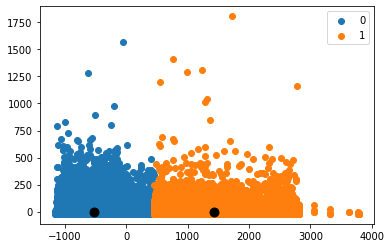

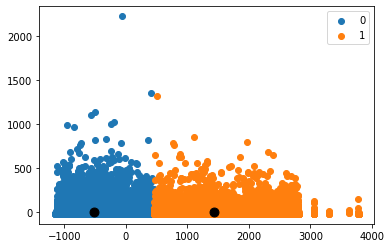

In [7]:
for i in range(k):
    (X_test, y_test) = test_sets[i]
    yup = kmeans_preds[i]
    label_names = np.unique(yup)             # Get unique label names
    centroids = kmeans.cluster_centers_      # Get cluster centers from the model
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[yup == j , 0] , X_test[yup == j , 1] , label = j)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

### Plot KNN

KNN Accuracy: 0.6313366184170003


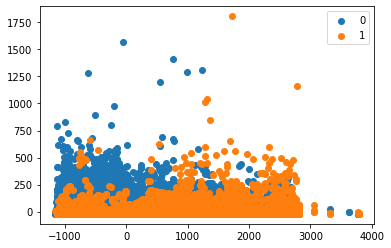

KNN Accuracy: 0.6303048968278411


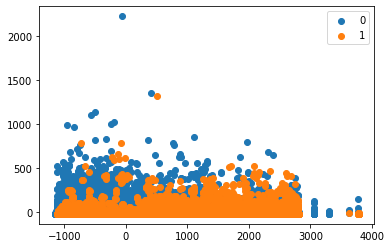

In [8]:
for i in range(k):
    ysp = knn_preds[i]
    (X_test, y_test) = test_sets[i]
    label_names = np.unique(ysp)             # Get unique label names
    print("KNN Accuracy:",sklearn.metrics.accuracy_score(y_test, ysp))
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[ysp == j , 0] , X_test[ysp == j , 1] , label = j)
    plt.legend()
    plt.show()